In [34]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import fbeta_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split

In [22]:
train = pd.read_csv("c:\\1\\train.csv", delimiter=',')
test = pd.read_csv("c:\\1\\test.csv", delimiter=',')
train.head(1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False


<AxesSubplot:>

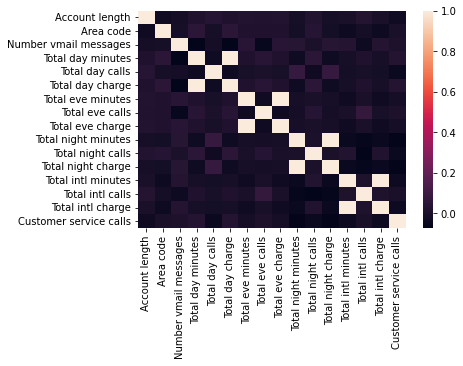

In [21]:
sns.heatmap(test.corr())

In [23]:
train = train.drop(['State','Total day charge','Total eve charge','Total night charge','Total intl charge'], axis = 1)
test = test.drop(['State','Total day charge','Total eve charge','Total night charge','Total intl charge'], axis = 1)

<AxesSubplot:>

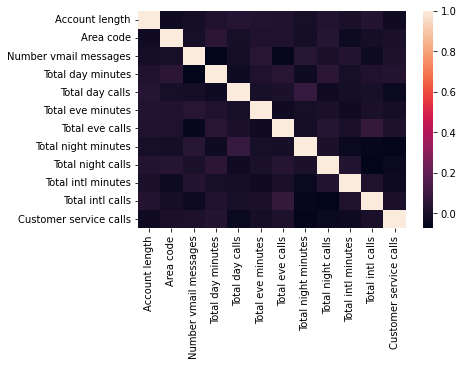

In [24]:
sns.heatmap(test.corr())

In [27]:
test.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          667 non-null    int64  
 1   Area code               667 non-null    int64  
 2   International plan      667 non-null    object 
 3   Voice mail plan         667 non-null    object 
 4   Number vmail messages   667 non-null    int64  
 5   Total day minutes       667 non-null    float64
 6   Total day calls         667 non-null    int64  
 7   Total eve minutes       667 non-null    float64
 8   Total eve calls         667 non-null    int64  
 9   Total night minutes     667 non-null    float64
 10  Total night calls       667 non-null    int64  
 11  Total intl minutes      667 non-null    float64
 12  Total intl calls        667 non-null    int64  
 13  Customer service calls  667 non-null    int64  
dtypes: float64(4), int64(8), object(2)
memory 

In [30]:
train['Churn'].value_counts() # Посмотрим на баланс классов

False    2278
True      388
Name: Churn, dtype: int64

In [31]:
train['International plan'] = train['International plan'].replace({"Yes":1,"No":0}).astype('int64')
train['Voice mail plan'] = train['Voice mail plan'].replace({"Yes":1,"No":0}).astype('int64')
test['International plan'] = test['International plan'].replace({"Yes":1,"No":0}).astype('int64')
test['Voice mail plan'] = test['Voice mail plan'].replace({"Yes":1,"No":0}).astype('int64')

In [35]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Churn'],axis=1),
                                                    train['Churn'], test_size=0.2, 
                                                    random_state=42)

In [73]:
# Инициализируем модель состоящую из 1000 решающих деревьев
rf = RandomForestClassifier(n_estimators=100, max_depth=)

# Обучим эту модель
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
fbeta_score(y_test, y_pred, beta = 2)

RandomForestClassifier(max_depth=5)

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier(random_state = 1)
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [80]:
bestF.best_params_

{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 500}

In [81]:
y_pred = bestF.predict(X_test)
fbeta_score(y_test, y_pred, beta = 2)

0.6456043956043955

In [83]:
forest = RandomForestClassifier()
parametrs = {'n_estimators':[100, 300, 500, 800, 1200],'max_depth':[5, 8, 15, 25, 30]}
gr = GridSearchCV(forest, parametrs ,cv = 5)
gr.fit(X_train, y_train)
gr.best_params_

{'max_depth': 15, 'n_estimators': 1200}

In [84]:
y_pred = gr.predict(X_test)
fbeta_score(y_test, y_pred, beta = 2)

0.6456043956043955

In [238]:
from xgboost import XGBClassifier

#xgb = XGBClassifier(n_estimators=1000,max_depth=10,min_child_weight=10,gamma=0,subsample=0.8,  
 #                        colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)  
 

xgb = XGBClassifier(n_estimators=1000,max_depth=7,min_child_weight=1,gamma=1,scale_pos_weight=3)
#0.7783641160949869
#0.8355091383812009
# Обучим эту модель
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
fbeta_score(y_test, y_pred, beta = 2)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8355091383812009

In [239]:
submit = pd.read_csv('c:\\1\\sample_submission.csv')

In [240]:
submit['Churn'] = xgb.predict(test)

In [242]:
submit.to_csv('c:\\1\\submit_xgb.csv',index_label = False,index = False)